In [13]:
# %load ./import.py
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
!ls ./Data


Baseball96.xlsx  Countryregion.xlsx  Grocery.xlsx  USmacrodata.xls
Cardata.xlsx	 Fizzy.xlsx	     Oreos.xlsx


In [14]:
!ls Data

Baseball96.xlsx  Countryregion.xlsx  Grocery.xlsx  USmacrodata.xls
Cardata.xlsx	 Fizzy.xlsx	     Oreos.xlsx


#### 1.   Fizzy Drugs wants to optimize the yield from an important chemical process. The company thinks that the number of pounds produced each time the process runs depends on the size of the container used, the pressure, and the temperature. The scientists involved believe the effect to change one variable might depend on the values of other variables. The size of the process container must be between 1.3 and 1.5 cubic meters; pressure must be between 4 and 4.5 mm; and temperature must be between 22 and 30 degrees Celsius. The scientists patiently set up experiments at the lower and upper levels of the three control variables and obtain the data shown in the fi le Fizzy.xlsx.

a. Determine the relationship between yield, size, temperature, and pressure.

b. Discuss the interactions between pressure, size, and temperature.

c. What settings for temperature, size, and pressure would you recommend?

In [15]:
fi=pd.read_excel("Data/Fizzy.xlsx",header=0)
fi.head() 

,Yield,Size,Pressure,Temperature,S*P,S*T,P*T
0,1550,1.3,4.0,22,5.20,28.6,88
1,1925,1.5,4.0,22,6.00,33.0,88
2,2150,1.3,4.5,22,5.85,28.6,99
3,2350,1.5,4.5,22,6.75,33.0,99
4,1525,1.3,4.0,30,5.20,39.0,120


In [16]:
print("columns",fi.columns)

columns Index(['Yield', 'Size', 'Pressure', 'Temperature', 'S*P', 'S*T', 'P*T'], dtype='object')


#### a. Determine the relationship between yield, size, temperature, and pressure.

Ans a.
* Spliting data set

In [17]:
y_1=fi[['Yield']]
X_1=fi[['Size', 'Pressure', 'Temperature']]

* Regression without interaction

In [18]:
X_1=sm.add_constant(X_1)
model_1=sm.OLS(y_1,X_1).fit()
model_1.summary()

/home/boo/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     82.66
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           2.78e-08
Time:                        03:51:29   Log-Likelihood:                -88.946
No. Observations:                  16   AIC:                             185.9
Df Residuals:                      12   BIC:                             189.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3811.4062    416.765     -9.145      0.000   -4719.459   -2903.353
Size         1084.3750    181.331      5.980      0.000     689.289    1479.461
Pressure     1048.7500     72.532     14.459      0.000     890.716    1206.784
Temperature    -8.0469      4.533     -1.775      0.101     -17.924       1.830
==============================================================================
Omnibus:                        0.998   Durbin-Watson:                   2.350
Prob(Omnibus):                  0.607   Jarque-Bera (JB):                0.726
Skew:                           0.080   Prob(JB):                        0.695
Kurtosis:                       1.968   Cond. No.                         642.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion a.

* Yield is dependent on upon Pressure and Size and not related to Temprature if interaction are ignored.

####  b. Discuss the interactions between pressure, size, and temperature.


In [19]:
X_1b=fi[['Size', 'Pressure', 'Temperature', 'S*P', 'S*T', 'P*T']]
X_1b=sm.add_constant(X_1b)
model_1b=sm.OLS(y_1,X_1b).fit()
model_1b.summary()

/home/boo/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1063.
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           2.63e-12
Time:                        03:51:29   Log-Likelihood:                -61.030
No. Observations:                  16   AIC:                             136.1
Df Residuals:                       9   BIC:                             141.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.888e+04   1019.339    -18.525      0.000   -2.12e+04   -1.66e+04
Size         1.197e+04    666.719     17.959      0.000    1.05e+04    1.35e+04
Pressure     3825.6250    226.306     16.905      0.000    3313.685    4337.565
Temperature   111.0938     20.159      5.511      0.000      65.491     156.697
S*P         -2012.5000    146.309    -13.755      0.000   -2343.473   -1681.527
S*T           -89.8438      9.144     -9.825      0.000    -110.530     -69.158
P*T             1.5625      3.658      0.427      0.679      -6.712       9.837
==============================================================================
Omnibus:                        0.280   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.444
Skew:                           0.045   Prob(JB):                        0.801
Kurtosis:                       2.189   Cond. No.                     4.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dataset: 	 16
X: 	 16
1. Normality Test:  Jarque-Bera Test
-----------------------------------------------
Good
Reason: Residual Normally distributed
-----------------------------------------------


2. Linearity Test:  Rainbow Test
-----------------------------------------------
Good
Reason: Data have linear relationship
-----------------------------------------------


3. Heteroscedasticity Test:  Breusch-Pagan Test
-----------------------------------------------
Good
Reason: Data have same variance accross
-----------------------------------------------


4. Autocorrelation Test:  Breusch Godfrey Test
-----------------------------------------------
Good
Reason: Data are not related to themself:1 lag
-----------------------------------------------


5. Sum of residuals == 0
-----------------------------------------------
Good
Reason: Sum of residuals = 0
-----------------------------------------------


6. Checking outliers:
-----------------------------------------------
Mode select

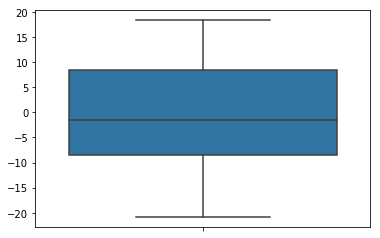

-----------------------------------------------



7. Checking multicolinearity
-----------------------------------------------


<Figure size 432x288 with 0 Axes>

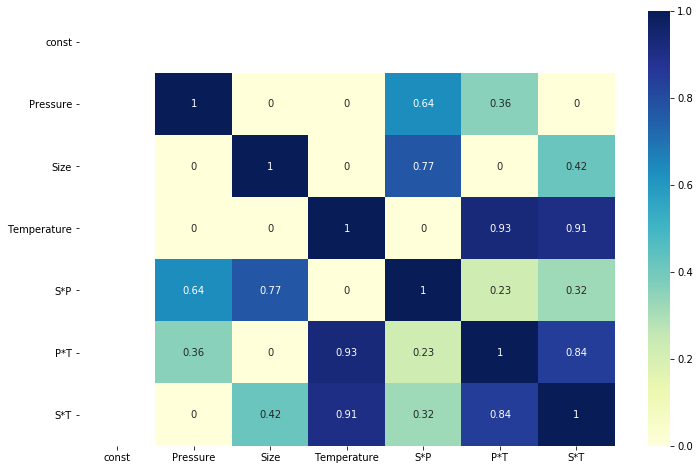

-----------------------------------------------


<Figure size 432x288 with 0 Axes>

In [20]:
from ols_diag import ols_diag
ols_diag(fi,X_1b,model_1b)

#### Conclusion b.
* Pressure, Temprature, Size have positive association on Yield.
* S*P and S*T have negative association on Yiled.

#### c. What settings for temperature, size, and pressure would you recommend?

- From above summary we will recommend values in order of priority:

1. P: Presure should be set to max value and thus P=4.5
2. S*P: Size should be set to least value (as P is already max) and thus S= 1.3
3. S*T: Since size is set to least hence T is also set to least, and thus T=22
4. Putting above values is equation the Yield would be: 

In [21]:
model_1b.params

const         -18883.43750
Size           11973.43750
Pressure        3825.62500
Temperature      111.09375
S*P            -2012.50000
S*T              -89.84375
P*T                1.56250
dtype: float64

In [22]:
P1=4.5
S1=1.3
T1=22
X_1val=[1,S1, P1, T1, S1*P1, S1*T1, P1*T1]
round(sum(model_1b.params*X_1val))

2153

#### Conclusion c:
* Max Yield = 2153 Units